<a href="https://colab.research.google.com/github/Sokey123456/machine-learning/blob/main/%E5%8D%98%E7%B4%94%E3%83%99%E3%82%A4%E3%82%BA%E6%B3%95%E3%81%AB%E3%82%88%E3%82%8B%E7%95%B0%E5%B8%B8%E6%A4%9C%E7%9F%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **単純ベイズ法による異常検知**
## **目的**
- 単純ベイズ法の概念理解(定義、仮定、性質等)
- 実装
- 課題

## **モチベーション**
- 多次元のデータに対する異常検知問題を、**1次元の異常検知問題に帰着する**ための枠組み！

## **注目ポイント**
- ラベル付きデータとラベル無しデータの双方に対し、一般的な異常度が多項分布と多次元正規分布に対し、それぞれ具体的にどのような式になるか？

## **単純ベイズ法の定義**

### **訓練データの定義**
(ラベルありの訓練データを考える)
$$\mathcal{D} = \{ (x^{(n)},y^{(n)})\in \mathbb{R}^M\times\{0,1\} : n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.
#### **上記を定義の下では、以下を仮定されている**
**仮定：**$\mathcal{D}$ の中には異常標本が含まれていない、または含まれていたとしても圧倒的少数である


#### **単純ナイーブベイズの仮定**

$M$次元のそれぞれが($y$を1つ決めたという条件の下で)に独立であると仮定する.\
よって、条件付き確率密度関数$f(・|y):\mathbb{R}^M \to [-\infty,\infty]$ が存在した時、次が成り立つ

$$f(\textbf{x}|y) = f(\textbf{x}_1|y)f(\textbf{x}_2|y)\cdots f(\textbf{x}_M|y) = \prod_{i=1}^M f(\textbf{x}_i|y) \tag{1.1}$$

単純ベイズ法(ナイーブベイズ法)では、上記を仮定する.\
つまり、変数ごと(変数の次元ごと)に問題を切り分けるという単純な方法で解決する

### **定理3.1**
式(1,1)のように変数ごとに積の形となっている場合、$M$変数のそれぞれに対して別々に最尤推定することで、モデルのパラメータを求めることができる

### **独立変数モデルの下でのホテリング$T^2$法**
### **訓練データ 定義**
(ラベル無しの訓練データを考える)
$$\mathcal{D} = \{ x^{(n)}\in \mathbb{R}^M: n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.

観測値の確率変数が互いに独立であると仮定し,観測値の確率分布モデルとして、次の多変量正規分布を仮定する
$$ f( x) = \prod_{i=1}^M \frac{1}{\sqrt{2\pi\Sigma_{ii}}} \exp\left\{{-\frac{(x_i-\mu_i)^2}{2\Sigma_{ii}}}\right\}$$
(すなわち、多変量正規分布において、分散共分散行列の非対角成分がすべて0となっている状態)

対数尤度を $\mu_i$ および $\Sigma_{ii}$ に対して微分して0と等値することにより最尤解が得られる\
$N$ 個の独立標本 $\mathcal{D} = \{ \textbf{x}^{(n)}\in \mathbb{R}^M: n\in \{1,2,\ldots,N\}\}$に対して

標本平均
$$ \hat{\mu}_i := \frac{1}{N} \sum_{n=1}^N {x}_i^{(n)} \tag{3.2}$$

標本分散共分散行列
$$ \hat{\Sigma}_{ii} := \frac{1}{N} \sum_{n=1}^N ({x}_{i}^{(n)}-\hat{\mu}_i)^2 \tag{3.3} = \hat{\sigma}_i^2$$



ある集団内の点が多変数ベクトル$(x_1,x_2,\ldots, x_M)^T$で表される時、平均値$(\mu_1,\mu_2,\ldots, \mu_M)$と表し、集団の共分散行列を$\Sigma$とする.\
この時、ある点$(x_1,x_2,\ldots, x_M)^T$から集団へのマハラノビス距離は、以下のように定義される.
$$a(x) = \sqrt{(x-\mu)^T\Sigma^{-1}(x-\mu)} $$

今回、観測値に関する確率変数が互いに独立であると仮定しているため、以下のように計算できる.
$$a(\textbf{x}') = \sum_{i=1}^M \left(\frac{x_i'-\hat{\mu_i}}{\hat{\sigma}_i}\right)^2\tag{3.5}$$

実用上で、変数同士が独立であるという仮定が必ずしも正しくなくても、異常度の大きさを見積もるためには有用な式である

実際不等式は以下のようになるため、
$$ \sum_{i=1}^M \left(\frac{x_i'-\hat{\mu_i}}{\hat{\sigma}_i}\right)^2\le \sqrt{(x-\mu)^T\Sigma^{-1}(x-\mu)} $$

マハラノビス距離の下限を計算していることを意味しており、最低でも(3.5)くらいは異常度を持つことを意味する

In [ ]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=1fcb5a7b11c511a664ae9c2ba22370886e48b347547128b8fc7df2d091613361
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

In [ ]:
import numpy as np
from scipy import linalg

def box_muller(n):
    """乱数の発生
    """
    r1 = np.random.rand(n)
    r2 = np.random.rand(n)

    x = np.sqrt(-2*np.log(r1)) * np.sin(2*np.pi*r2)
    return x

def sampling_gaus(n, sample, mu, sigma):
    """ガウス分布からのサンプリング
    """
    L = np.linalg.cholesky(sigma)

    Y = np.array([np.dot(L, box_muller(n)) for _ in range(sample)]) + mu
    return Y

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12354 (\N{HIRAGANA LETTER A}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12383 (\N{HIRAGANA LETTER TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12418 (\N{HIRAGANA LETTER MO}) missing from current font.
  func(*args, **k

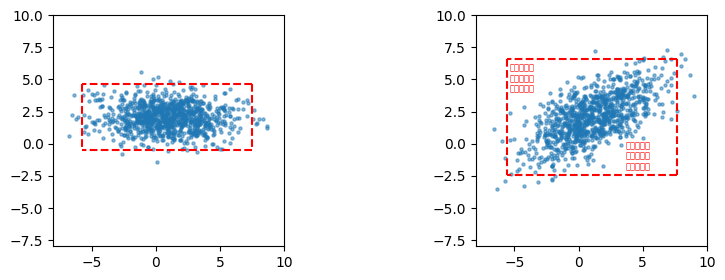

In [ ]:
from scipy.stats import chi2
import matplotlib.pyplot as plt

# 有意水準
alpha = 0.01

# 閾値
ath = chi2.ppf(q=1-alpha, df=1, scale=1)

# 図用の座標
x = np.arange(-10,10,0.1)
y = np.arange(-10,10,0.1)
xy =np.meshgrid(x,y)
xy = np.array(xy).T

fig ,axes = plt.subplots(nrows=1, ncols=2, figsize=(5*2, 3*1))

# 変数間に相関がない場合
data = sampling_gaus(2, 1000, [1,2], [[7, 0], [0,1]])

# 異常度の計算
a = np.sum((((xy - data.mean(axis=0))/data.std(axis=0))**2), axis=2)
rect_x, rect_y= np.sqrt(ath)*data.std(axis=0)+data.mean(axis=0)
rect_width, rect_height = -np.sqrt(ath)*data.std(axis=0)+data.mean(axis=0)

ax = axes[0]
ax.scatter(data[:,0], data[:,1], alpha=.5,s=5);
ax.hlines([rect_y, rect_height],rect_x,rect_width, 'red', '--')
ax.vlines([rect_x,rect_width],rect_y, rect_height, 'red', '--')
ax.set_xlim(-8, 10)
ax.set_ylim(-8, 10)
ax.set_box_aspect(1)

# 変数間に相関がある場合
data = sampling_gaus(2, 1000, [1,2], [[7, 3], [3, 3]])

# 異常度の計算
a = np.sum((((xy - data.mean(axis=0))/data.std(axis=0))**2), axis=2)
rect_x, rect_y = np.sqrt(ath)*data.std(axis=0)+data.mean(axis=0)
rect_width, rect_height = -np.sqrt(ath)*data.std(axis=0)+data.mean(axis=0)

ax = axes[1]
ax.scatter(data[:,0], data[:,1], alpha=.5, s=5);
plt.text(rect_x-4,  rect_height +0.5, "このあたり\nも異常値と\n判断すべき", color="red", fontsize=6, )
plt.text(rect_x-7.5 + rect_width, rect_y-2.5, "このあたり\nも異常値と\n判断すべき" , color="red", fontsize=6,)

ax.hlines([rect_y, rect_height],rect_x,rect_width, 'red', '--')
ax.vlines([rect_x,rect_width],rect_y, rect_height, 'red', '--')
ax.set_xlim(-8, 10)
ax.set_ylim(-8, 10)
ax.set_box_aspect(1)

## **多項分布による単純ベイズ分類**


### **多項分布：頻度についての分布**
#### **具体例:迷惑メール振り分け問題**
迷惑メールのフィルターは、それぞれのメールにおける単語の頻度を計算し、それを書くメールを特徴づける特徴量として使用する.\

列挙した単語の数を$M$と表す\
1つのメールは、単語の頻度を単語ごとに集計したベクトルとして次のように表される
$$\textbf{x} = (0,0,0,1,0,0,2,0,0\ldots)^T$$

1次元目は「愛」という単語の出現回数, 2次元目は「合いの手」という単語の出現回数のような感じである.\
単語の袋詰めとみなし、その袋詰めのベクトルとして展開したものに対応している. 単語袋詰め(bag-of-words,BOW)モデルと呼ぶ

### **数学的解釈**
BOWは単語同士の関係を独立として考える\
各々の文字の個数の確率変数を互いに独立な$X_1,X_2,\ldots,X_M$とし、
$\textbf{X} = (X_1,X_2,\ldots,X_M)$とする.\
この時、$\textbf{X}$が多項分布に従うとは、次の確率分布に従う確率変数である.
$$
\mathbb{P}(\textbf{X}=(x_1,x_2,\ldots x_M)) =
\frac{(x_1+\cdots+x_M)!}{x_1!x_2!\cdots x_M!}\theta_1^{x_1}\theta_2^{x_1}\cdots \theta_M^{x_M}
$$
但し、$\sum_{i=1}^M \theta_i=1$を満たす.\
実際、$\{\theta_i\}_{i\in(1,2,\ldots,M)}$は未知であるため、以下のような関数を作成し、最尤推定で$\{\theta_i\}_{i\in(1,2,\ldots,M)}$を推定する.
$$
f_X(x_1,\ldots,x_M;\theta_1,\theta_2,\ldots,\theta_M)=
\frac{(x_1+\cdots+x_M)!}{x_1!x_2!\cdots x_M!}\theta_1^{x_1}\theta_2^{x_1}\cdots \theta_M^{x_M}
$$

### **多項分布の最尤推定**
引き続き迷惑メールの分類問題を考える
過去のメールが$N$通, 迷惑メール$(y=1)$か普通メール$(y=0)$かを表すフラグとともに蓄積されているとし、異常度を計算することで迷惑メールの判定をすると考える.\




最初のステップはyごとに $x$ の分布を求める  
$y = 0$ と $1$ に対応して、$Multi(x|\theta^0)$ と $Multi(x|\theta^1)$ という 2 つモデルを仮定し、未知パラメータ $\theta^0$ と $\theta^1$ を最尤推定する

モデルパラメータの対数尤度は以下のように書ける

$$
L(\theta^0, \theta^1 | \mathcal{D}) = \sum_{n \in \mathcal{D}^1} \sum_{i=1}^M x_i^{(n)} \ln \theta_i^1 + \sum_{n \in \mathcal{D}^0} \sum_{i=1}^M x_i^{(n)} \ln \theta_i^0 + (\text{定数})
$$

この $L(\theta^0, \theta^1 | \mathcal{D})$ を、制約 $\sum_{i=1}^M \theta_i^1 = 1$ および $\sum_{i=1}^M \theta_i^0 = 1$ のもとで最大化すると、次のように解が得られる

$$
\hat{\theta}_i^0 = \frac{\sum_{i \in \mathcal{D}^0} x_i^{(n)}}{\sum_{i=1}^M \sum_{i \in \mathcal{D}^0} x_i^{(n)}} = \frac{\text{$\mathcal{D}^0$における単語 $i$ の出現総数}}{\text{$\mathcal{D}^0$ における全単語の出現総数}}
$$

$$
\hat{\theta}_i^1 = \frac{\sum_{i \in \mathcal{D}^1} x_i^{(n)}}{\sum_{i=1}^M \sum_{i \in \mathcal{D}^1} x_i^{(n)}} = \frac{\text{$\mathcal{D}^1$ における単語 $i$ の出現総数}}{\text{$\mathcal{D}^1$ における全単語の出現総数}}
$$

但し、$\lambda^0,\lambda^1$は、それぞれ制約条件$\sum_{i=1}^M\theta_i^1=1$, $\sum_{i=1}^M\theta_i^0=1$を満たす

この式だと、訓練データに一度も出てない単語についてパラメータは 0 になってしまうため、単語の頻度についてゲタをはかせる手法が以下である
**スムージング**\
たとえば、$\gamma>0$ を $x_i^{(n)}$ に加えたとすれば、上式の代わりに以下のような解となる.
$$
\hat{\theta}_i^y
= \frac{N_i^y + \gamma}{|\mathcal{D}^y|+M_\gamma} \tag{3.8}
$$
$N_i^y$ は $\mathcal{D}^y$ における単語 $i$ の出現数、$|\mathcal{D}^y|$ は $\mathcal{D}^y$ における全単語の出現総数のことである


### **迷惑メールの分類**

最後のステップとして、未知のメールの単語袋詰め表現 $x'$ が得られたとして、これを迷惑メール ($y' = 1$) か普通メール ($y' = 0$) かに分類する  
$p(x'|y, D)$ が多項分布に対応しているので、判定スコアの式は次のように得られる

$$
a(x') = \ln \frac{p(x'|y = 1, \mathcal{D})}{p(x'|y = 0, \mathcal{D})} = \sum_{i=1}^M x'_i \ln \frac{\hat{\theta}_i^1}{\hat{\theta}_i^0}
$$
ここで、$\alpha_i = \ln \left( \frac{\hat{\theta}_i^1}{\hat{\theta}_i^0} \right)$ により係数ベクトル $\alpha$ を定義すると、$a(x') = \alpha^T x'$ のような簡潔な式になる

これは多項分布に基づく単純ベイズ分類が、本質的には線形分類器であることを意味する


#### **アルゴリズム 3.1**

単純ベイズ分類による迷惑メールの分類のアルゴリズムを示す

用語集を作っておく (単語数 $M$)、スムージングの定数 $\gamma$ を決める (もっとも単純には $\gamma = 1$ とする)
- **訓練時 (最尤推定)**
  - 閾値決定用の検証データを訓練データとは別に取り分けておく
  - 訓練データ内の $y = 1$ の標本 (個々のメールから)、単語 $i$ の出現頻度 $N_i^1$ を数える
  - $|\mathcal{D}^1| = \sum_{i=1}^M N_i^1$を計算し、(3.8)の ${\hat{\theta}_i^1}$ を求める
  - $y = 0$ の標本についても同様にして $\theta_i^0$ を求める
  - 各 $i$ について $\alpha_i = \ln \left( \frac{\theta_i^1}{\theta_i^0} \right)$ を計算して記憶する
- **訓練時 (閾値の最適化)**
  - 検証データ内の標本に対して異常度 $a(x) = \alpha^T x$ を計算する
  - 正常標本精度と異常標本精度に関する図を作成し、異常判定の閾値 $a_{th}$ を決める
- **運用時**
  - やってきたメールの単語を数え、単語袋詰め表現 $x'$ を求める
  - 異常度 $a(x') = \alpha^T x'$ を計算する
  - $a(x') > a_{th}$ なら迷惑メールと判定する




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from google.colab import drive
drive.mount('/content/drive')

Path = '/content/drive/MyDrive/Colab Notebooks/sample_data/spam.csv'


# データの読み込み
df = pd.read_csv(Path, encoding='latin-1', sep='\t', names=['type', 'text'], skiprows=1, engine='python')

# 検証データと訓練データを分ける
X = pd.DataFrame(df['text'])
Y = pd.DataFrame(df['type'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=10)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 訓練データの単語の出現頻度を数える
vec_count = CountVectorizer(min_df=3)
vec_count.fit(X_train['text'])

# 単語数 M
M = len(vec_count.vocabulary_)
print('word size: ', M)
# 先頭５件の単語を表示
print('word content: ', dict(list(vec_count.vocabulary_.items())[0:5]))

word size:  423
word content:  {'sorry': 320, 'll': 209, 'call': 61, 'later': 198, 'in': 181}


In [ ]:
# 各文書をBoWに変換
X_train_vec = vec_count.transform(X_train['text'])
X_test_vec = vec_count.transform(X_test['text'])

pd.DataFrame(X_train_vec.toarray()[0:5], columns=vec_count.get_feature_names_out())

,000,10,100,1000,10p,11,150p,150ppm,16,18,...,xxx,ya,yeah,yes,yo,you,your,yr,yup,ã¼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


D1:  1191
D0:  4244
theta1の和:1.0000000000000002,theta0の和::1.0000000000000002


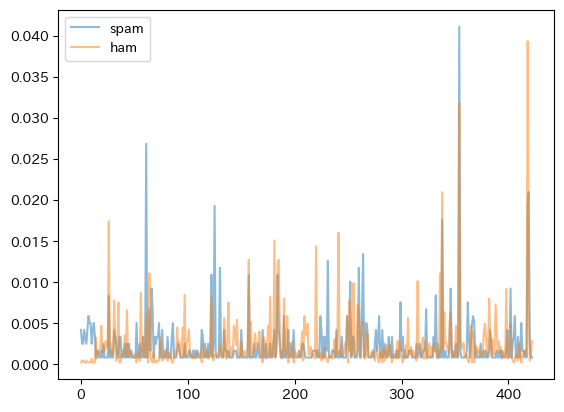

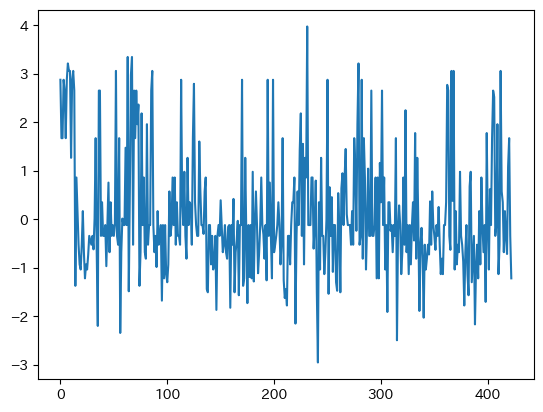

In [ ]:
# スパム(spam)と正常(ham)に分ける
X_train_vec1 = X_train_vec.toarray()[Y_train['type']=='spam']
X_train_vec0 = X_train_vec.toarray()[Y_train['type']=='ham']

gamma = 1
# 各単語の出現総数
N1 = np.sum(X_train_vec1, axis=0) + gamma
N0 = np.sum(X_train_vec0, axis=0) + gamma

# 全単語の出現総数
# D1 = |D^1| + M_gamma
D1 = np.sum(N1)
D0 = np.sum(N0)
print('D1: ', D1)
print('D0: ', D0)

# 各単語の出現確率
theta1 = N1 / D1
theta0 = N0 / D0
print("theta1の和:{0},theta0の和::{1}".format(np.sum(theta1), np.sum(theta0)))

plt.plot(theta1, alpha=.5, label='spam');
plt.plot(theta0, alpha=.5, label='ham');
plt.legend();
plt.show()

# 係数ベクトル
alpha = np.log(theta1 / theta0)
plt.plot(alpha);

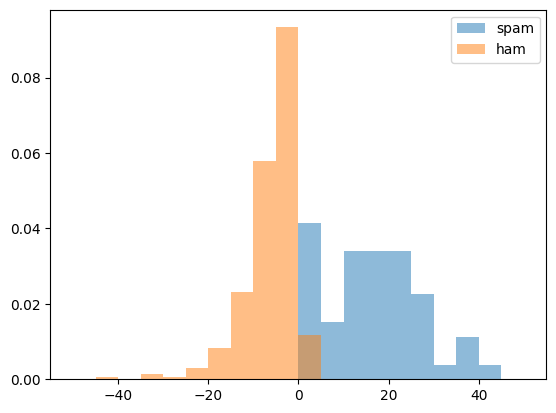

In [ ]:
# 判定スコアの計算
a1 = alpha@X_train_vec1.T
a0 = alpha@X_train_vec0.T

plt.hist(a1, alpha=.5, range=(-50,50), bins=20, density=True, label='spam');
plt.hist(a0, alpha=.5, range=(-50,50), bins=20, density=True, label='ham');
plt.legend();

In [ ]:
# 正常・異常データをまとめておく
x = np.append(a1, a0)
y = np.array([1]*len(Y_train[Y_train['type']=='spam']) + [0]*len(Y_train[Y_train['type']=='ham']))

# 正常標本精度と異常標本精度の計算
def make_accuracy(thresh=0.5):

    TP = np.sum((x > thresh).astype(int)*y) / np.sum(y==1) # y \in {0,1}のため、yをかければ1の部分だけ出てくる
    TF = np.sum((x <= thresh).astype(int)*(1-y)) / np.sum(y==0) # y \in {0,1}のため、1-yをかければ0の部分だけ出てくる
    return TP, TF

xx = np.arange(-75, 75, 0.5)
result = np.array([make_accuracy(thresh=t) for t in xx])

NameError: name 'np' is not defined

分岐点閾値:  1.0


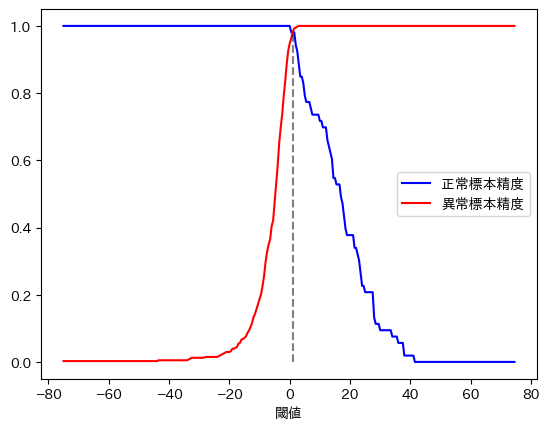

In [ ]:
import japanize_matplotlib
# 正常標本精度と異常標本精度から分岐点の決定
idx_be = np.argmin(np.abs(result[:,0] - result[:,1]))
a_th = xx[idx_be]
print('分岐点閾値: ', a_th)

plt.plot(xx, result[:,0], label='正常標本精度', color='blue');
plt.plot(xx, result[:,1], label='異常標本精度', color='red');
plt.vlines(a_th, 0, result[idx_be,0], linestyles='--', color='black', alpha=.5)
plt.legend();
plt.xlabel('閾値');

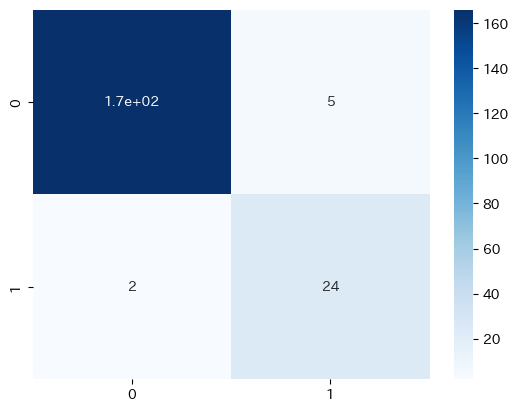

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#
y_true = np.array(Y_test['type']=='spam').astype(int)

a_pred = alpha@X_test_vec.T
y_pred = (a_pred >= a_th).astype(int)

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues');


### **二値分類と異常検知の関係**

### **ベイズ決定則の定義**
ベイズ決定則は以下で定義される

もし
$$
\ln \frac{p(y = 1|x)}{p(y = 0|x)} > 0
$$

ならば $y = 1$ と判定

ある任意の標本 $x$ が与えられたときにそれを $y = 0$ または $y = 1$ に分類するとし、その判定規則を

$$
\tilde{a}(x) \geq \tau \text{ ならば } y = 1
$$

のように書くことにする  
誤り確率は次のように書ける

$$
(\text{誤り確率}) = \int dx I[\tilde{a}(x) \geq \tau] p(y = 0|x) p(x) + \int dx \{1-I[\tilde{a}(x) \geq \tau]\} p(y = 1|x)p(x)
$$

$p(y = 1|x)p(x)$ を $x$ について微分したものは $p(y = 1)$ であるので次のように変形できる

$$
(\text{誤り確率}) = p(y = 1) + \int dx I[\tilde{a}(x) \geq \tau] p(y = 0|x) p(x) \left\{ 1 - \frac{p(y = 1|x)}{p(y = 0|x)} \right\}
$$

これを最小にする $a$ の関数形を選ぶ  
その中身で負の領域をすべて拾えるように決めればよいので、以下の解が求められる

$$
\tilde{a}(x) = \ln \frac{p(y = 1|x)}{p(y = 0|x)}, \quad \tau = 0
$$


#### **ベイズ決定則とネイマン・ピアソン決定則の違い**
ベイズの定理$p(\textbf{x}|y)p(y)\propto p(y|x)$に注意してまとめると以下となる.
- ネイマン・ピアソン決定則では、$p(x|y = 1)$ と $p(x|y = 0)$ の比がある閾値を超えたら異常で判定
- ベイズ決定則では、$p(x|y = 1)p(y = 1)$ と $p(x|y = 0)p(y = 0)$ の比が 1 を超えたら異常と判定

異常検知の場合、ほとんど常に $p(y = 1) \ll p(y = 0)$ だから、**ベイズ決定則は異常判定を強く抑制する傾向**にあることが分かる
ベイズ決定則における固定した閾値を、実験的に決める調整パラメータと考えれば、ネイマン・ピアソン決定則と実質的な違いはなくなる

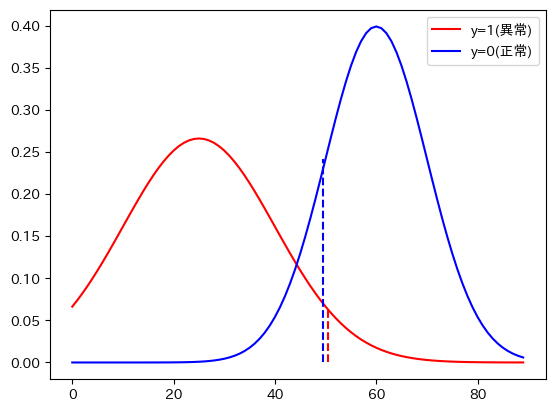

In [ ]:
from scipy.stats import norm

x = np.arange(0,9, 0.1)

p1 = norm.pdf(x, 2.5, 1.5)
p0 = norm.pdf(x, 6, 1.)

plt.plot(p1, label='y=1(異常)', color='red');
plt.plot(p0, label='y=0(正常)', color='blue');
plt.vlines(50.5, 0, p1[50], linestyles='--', color='red')
plt.vlines(49.5, 0, p0[50], linestyles='--', color='blue')
plt.legend();

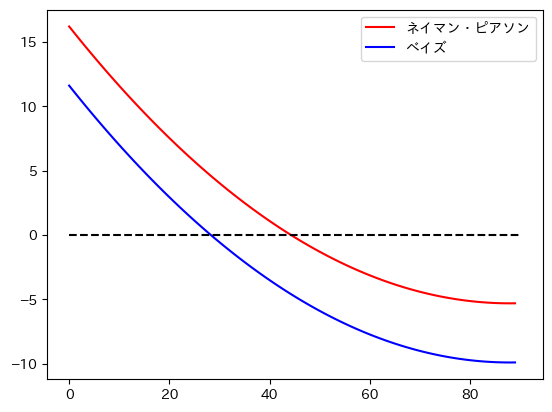

In [ ]:
py0 = 0.99
py1 = 0.01

plt.plot(np.log(p1/p0), label='ネイマン・ピアソン', color='red');
plt.plot(np.log((p1*py1)/(p0*py0)), label='ベイズ', color='blue');
plt.hlines(0, 0, 90, linestyles='--', color='black');
plt.legend();

参考文献
- 異常検知と変動検知 chapter3
- https://qiita.com/tanaka_benkyo/items/d15b901b81f9bf5d8895